In [44]:
import os
import json
import random
from pathlib import Path
from zipfile import ZipFile
from PIL import Image

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from classification_models.tfkeras import Classifiers

In [3]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

In [4]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [5]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [6]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [6]:
print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d lasaljaywardena/furniture-images-dataset

# url -> https://www.kaggle.com/lasaljaywardena/furniture-images-dataset?select=furniture_images

Dataset will be downloaded as zip under the current directory
 97%|████████████████████████████████████▉ | 37.0M/38.1M [00:00<00:00, 95.3MB/s]
100%|██████████████████████████████████████| 38.1M/38.1M [00:00<00:00, 87.6MB/s]


In [9]:
!unzip furniture-images-dataset.zip -d ../data

Archive:  furniture-images-dataset.zip
  inflating: ../data/furniture_data_img.csv  
  inflating: ../data/furniture_images/furniture_images/1634011558853_Furniture Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011559093_Bed Room Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011559259_6by6 Teak Box Bed with Hybrids Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011559590_New Spring Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011559751_Exclusive 6 by Teak Box Bed with Spring Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011559907_Tv Stand for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011560082_Exclusive 6 by 5 Teak Box Bed with Spring Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634011560266_New Phoenix 6 Pc Drawer Set for sale.jpg  
  inflating: ../dat

  inflating: ../data/furniture_images/furniture_images/1634012034964_House furnitures for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012035175_Wall Mirror for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012035330_Corner Sofa for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012035519_Teak dining table with 6 chairs for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012035693_72 x 9 Inches Mattress Spring for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012035883_Antique Almirah for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012036034_L Shape Sofa for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012036225_Antique Dining Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634012074097_Teak Furnitures available for sale for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1

  inflating: ../data/furniture_images/furniture_images/1634013231316_Outdoor Table Set 4 Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013231514_Computer Chair 001 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013231718_Size 321 Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013231917_New Library Cupboard Glass for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013232134_Bed 6ft 4ft for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013232335_NEW MELAMINE WRITING TABLE R for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013232572_Chest of Drawers for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013232766_Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634013232972_Dining Table with Chairs Mahogany for sale.jpg  
  inflating: ../data/furniture_images/furniture_image

  inflating: ../data/furniture_images/furniture_images/1634014922227_Computer Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014922393_4x2 Premium Office Tabels for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014922543_4x2 Ft New Colour Tables Code 3022 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014922722_Modern 4x2 Open Office Tabels for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014922914_Branded Melamine 3d cupbaords for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014923094_Teak 321 Sofa Set with Glass Stool  Tss1701 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014923329_New 16PCS Locker Sets for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014957779_Piyestra MidBk Office Chairs for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634014957940_New 6x3 DL Eco Plus Mattress

  inflating: ../data/furniture_images/furniture_images/1634015423714_Modern melamine iron cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015423894_Melamine 2D Display cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015424125_Brand new HQ baby Cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015424364_3D Premium piyestra cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015424574_+�-�-�+�-�-�+�-�-�+�-�-� +�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-� for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015425333_Modern 6x6 Teak Box Beds for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015425557_Branded teak dressing tables for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015426142_Brand New 3D Oc Cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/163401

  inflating: ../data/furniture_images/furniture_images/1634015888098_Japanese Bonded form mattress5x6JB1503 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015888515_Teak Box Bed 72x72  1510 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015888701_Arpico Hybrid Mattress72x72AHM1510 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015889006_Mahogany Tables for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015889397_Damro Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015889608_Modern Uncomon Reception Tabels for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015889812_Modern 3D Classic Display Cupboards for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015890014_Teak Large Lotus Sofa Set with Glass Stool TLLS506 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634015890261_Modern Eur

  inflating: ../data/furniture_images/furniture_images/1634016295921_Filling Rack for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016296236_Depo Teak Heavy Larga dressing table code 8927 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016296566_Visiror chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016296947_Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016297243_Depo Teak Heavy Pillow Sofa Set with Stone Table Code 8924 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016297448_Depo Teak Heavy Bed with Fox 8 inch spring mattress 56code 8922 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016297647_Filing Cabinet for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016297844_Depo Teak Heavy Bed with Fox 8 inch spring mattress 66code 8920 for sale.jpg  
  inflating: ../data/furniture_images/furnitur

  inflating: ../data/furniture_images/furniture_images/1634016724041_New Melamine 3 door Almirah code 8908 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016724483_Study Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016724673_Teak Wood Dining Table with 6 Chairs for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016724824_Dressing Table with Cupboard3 Door Melamine Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016725178_Wood Wardrobe for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016725341_Hybrid 3 Layer Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016725669_PIYESTRA Premium Study Table L for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016725855_Kingstar HiRack l Study Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634016726030_Book Cupboard L for 

  inflating: ../data/furniture_images/furniture_images/1634017043355_New Folding Table 3+�-�2ft for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017043556_Mesh Head Rest Office Chair A73 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017043716_Executive HiBack Office Chair EDH001 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017043942_LATEST DINNING TABLE with 6 CHAIRS SNP 887 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017044114_MODERN WING CHAIR SNP 8745 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017044359_MODERN DINNING TABLE SET SNP 985 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017044545_LATEST DINNING TABLE with 6 CHAIRS SNP 675 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017044764_BRAND NEW DINNING TABLE with 6 CHAIRS SP 7878 for sale.jpg  
  inflating: ../data/furniture_images/fu

  inflating: ../data/furniture_images/furniture_images/1634017342880_Teak Box Bed 6 X4  Hybrid Mattress  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017343066_Teak Box Bed  Singer Hayleys Spring Mattress 6 X4  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017343235_Teak Box Bed 6X6  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017343407_Bed Teak 6ft3ft for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017343599_6X4 Teak Box Bed  Arpico Spring Mettress 006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017343774_MDF OC CUPBOARD  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017344017_Glass Office Cupboard  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017344306_Small Written Table with Rack  006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/163401734448

  inflating: ../data/furniture_images/furniture_images/1634017566093_Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017566275_Original computer chairs typist for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017566626_Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017566829_3 Door Steel Cupboard 6 By 5 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017567122_Tempered Glass Dining Table Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017567302_Office Cupboard Damro for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017567661_Household Furnitures for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017567841_Teak Wooden Sofa Set with Coffee Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017567994_Table Mate II for sale.jpg  
  inflating: ../data/furniture_images

  inflating: ../data/furniture_images/furniture_images/1634017921585_Table 4ft 2ft for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017921893_Brand new Teak Box Bed 6 X4  005 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017922082_Teak Box Bed with Arpico Hybrid Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017922470_Teak Dinning Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017922643_New 6 X6 Teak Box Bed  005 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017922815_Brand New Teak Dressing Table  005 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017923116_Brand New 6 X6 Teak Box Bed  Arpico Spring Mettress  005 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634017923322_Brand New 6 X4 Teak Box Bed  Singer Hayleys Spring Mettress for sale.jpg  
  inflating: ../data/furniture_images/furn

  inflating: ../data/furniture_images/furniture_images/1634018804476_Teak Sofa Set 321 with StoolTSW1011 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018804676_Teak Dining Table with 6 Chairs  MDT 1005 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018804883_Teak dining table with 6 chairs  TWC1004 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018805091_Teak Sofa Set 321 with StoolTSS1010 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018805306_Teak Sofa Set 321 with StoolTSW1006 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018805493_Teak Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018805667_Wardrobe for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018805866_Jack Wood Windows for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634018806061_Bed Sheet for sale.jpg  
  

  inflating: ../data/furniture_images/furniture_images/1634020030829_Teak Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020031014_Leather Office Chair New for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020031330_Alpha Safe Locker for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020031523_Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020031845_Depo teak natural design dining table with 6 chairs  dtnd1004 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020032169_Depo teak dining table with 6 chairs  dtdc1003 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020032482_Depo teak Stripe Pillows Sofa Set 321 with Stool  tsps1002 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020032664_Teak 321 Sofa Set with Stool for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634020032829

  inflating: ../data/furniture_images/furniture_images/1634021249903_3 2 1 Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021250304_Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021250528_6ft3ft Steel Single Bed for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021250871_Computer Table with Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021251198_Damro Piyestra Spring Mattress 8 Inch for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021282315_Sofa Set Pumpkin for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021282510_Computer Table with Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021282854_MELAMINE TV STAND WITH CUPBOARD for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634021283191_Steel Cupboard 6 by 4 for sale.jpg  
  inflating: ../data/furniture_i

  inflating: ../data/furniture_images/furniture_images/1634022007060_Teak Three Door Almirah6ftx65ftTT3105 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022007453_Dinning Table  10 Chairs8ftx4ftDTN3115 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022007760_Teak Two Door Almirah45ftx6ftTT3105 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022008162_Dinning Table  Chairs6x3DTN3116 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022008416_Teak Dressing table with LEDTDT3119 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022008758_Dinning Table  Chairs6x3DTN3118 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022009027_Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022009359_Couch Coat double for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634022009765_Storage Wardrobe fo

  inflating: ../data/furniture_images/furniture_images/1634023084906_Diwan Sofa BC1 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023085304_Furniture sofa for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023085632_SOFA WITH COFFEE TABLE for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023086009_Couch Coat Single Seater Sofa Cover Reversible Slipcover for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023086362_+�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-�+�-�-+ Showcased for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023086678_Bunker Bed for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023086885_8 Door Portable Storage Closet Wardrobe Cabinet for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634023087049_Couch Coat Tripe Seat Sofa Cover Reversible Washable BrownBeige for sale.jpg  
  inflating: ../data/furniture

  inflating: ../data/furniture_images/furniture_images/1634024239231_Chairs  Classroom Full Seat for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024239652_Daxer 6 Drawers Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024240067_Dining Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024240369_Office Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024240686_Wooden Bed for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024241031_Ironing Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024241294_Damro Office Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024241639_Office Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024241970_Table for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634024242351_Black Teakwood Sofa Set for sale.

  inflating: ../data/furniture_images/furniture_images/1634025533408_Teak box bed with arpico hybrid mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025533732_Teak Box Two Door Wardrobe for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025534056_Office Executive Chair80KG for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025534225_Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025534511_6x5 ft Springs Mattress for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025534843_Library Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025535088_No1 Quality MDF Coner Stand for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025535376_shoe rack for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634025535545_Hq MDF Telephone Stand for sale.jpg  
  inflating: ../data/furniture_images/

  inflating: ../data/furniture_images/furniture_images/1634026703564_Depo teak dining table with 6 chairs  dtdc307 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026703981_Depo teak dining table with 6 chairs 6x3  tdtc306 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026704351_Sofa set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026704536_Teak Large melon sofa set with glass stool  tmss302 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026704916_Teak Large melon sofa set with glass stool  tmss301 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026705416_Teak Stripe Pillows Sofa Set 321 with Stool  tsps300 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026705717_Chair for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634026706102_Teak wood two doors wardrobe for sale.jpg  
  inflating: ../data/furniture_

  inflating: ../data/furniture_images/furniture_images/1634027623885_3D Wardrobe 6x4ft for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027624186_2D Melamine Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027624387_Melamine 3D Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027624569_Mirror with 3D Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027624919_Ft Melamine Cupboard for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027625219_Divan bed for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027625435_Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027625634_LOBBY SOFA SET for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634027651437_King Size Teak Bed with Wardrobe and Sofa for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/16340276

  inflating: ../data/furniture_images/furniture_images/1634028650456_Supreme 3d Display Cupboard cvh78 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028650898_5 star Hotel 3 layer cake Quilted Matress 666 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028651215_Brand New Teak Box Bed 6 X5 Finishing  015 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028651599_Bean Bag for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028651947_Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028652232_Brand New Teak Sofa Set  015 for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028652439_L Sofa Set for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028652779_Restaurant Table and Chairs for sale.jpg  
  inflating: ../data/furniture_images/furniture_images/1634028653118_Cash Box for sale.jpg  
  inflating: ../data/furni

In [11]:
data_path = '../data/'

In [12]:
pd.read_csv(data_path + 'furniture_data_img.csv')

,Label,Furniture_Type,Image_File
0,furniture set,Other,/furniture_images/1634011558853_Furniture Set ...
1,bed room set,Bed / bedroom item,/furniture_images/1634011559093_Bed Room Set f...
2,6by6 teak box bed with hybrids mattress,Bed / bedroom item,/furniture_images/1634011559259_6by6 Teak Box ...
3,new spring mattress,Bed / bedroom item,/furniture_images/1634011559590_New Spring Mat...
4,exclusive 6 by teak box bed with spring mattress,Bed / bedroom item,/furniture_images/1634011559751_Exclusive 6 by...
...,...,...,...
9341,library cupboard,Storage,/furniture_images/1634028757107_Library Cupboa...
9342,piyestra cupboard,Storage,/furniture_images/1634028757269_Piyestra Cupbo...
9343,dark 3d wardrobe,Bed / bedroom item,/furniture_images/1634028757678_Dark 3d wardro...
9344,3 door cupboard,Bed / bedroom item,/furniture_images/1634028757990_3 Door cupboar...


In [49]:
def get_random_image(path):
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])
    full_path = path + '/' + random_filename
    plt.imshow(Image.open(full_path))
    return full_path

In [50]:
img_path = data_path + 'furniture_images' + '/' + 'furniture_images'

'../data/furniture_images/furniture_images/1634028655039_Teak wood Almirah with Dressing Table for sale.jpg'

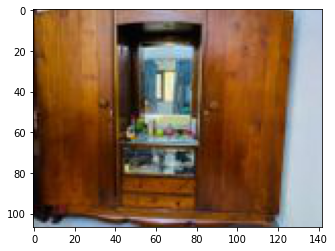

In [52]:
get_random_image(img_path)

In [ ]:
# prepare your data
X = ...
y = ...

X = preprocess_input(X)

n_classes = 10

In [ ]:
base_model = ResNet18(input_shape=(224,224,3), weights='imagenet', include_top=False)

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y)